In [2]:
import os
import pandas as pd
 
from tensorflow.keras import layers
from tensorflow.keras import Model
 
from tensorflow.keras.applications.vgg16 import VGG16
 
 
from tensorflow.keras.models import Model,Sequential
 
from tensorflow.keras.layers import Flatten,Dense,Dropout,BatchNormalization
from tensorflow.keras.optimizers import RMSprop , Adam , Adamax , Adadelta
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing import image

In [3]:
pretrained_model = VGG16(input_shape=(224,224, 3), 
                              include_top=False,
                              weights = 'imagenet')

In [4]:
!pip install opendatasets

In [7]:
import opendatasets as od

In [9]:
od.download("https://www.kaggle.com/datasets/fanconic/skin-cancer-malignant-vs-benign")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: jusutisu
Your Kaggle Key: ········


100%|██████████| 325M/325M [02:03<00:00, 2.75MB/s] 


In [4]:
for layer in pretrained_model.layers:
    layer.trainable = False

In [5]:
pretrained_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [6]:
x = layers.Flatten()(pretrained_model.output)
 
x  = layers.Dense(4096 , activation='relu')(x)
x  = layers.Dense(4096 , activation='relu')(x)
 
   
x = layers.Dense(2, activation='softmax')(x)

In [7]:
model = Model(pretrained_model.input, x)

In [8]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [9]:
model.compile(optimizer = Adam(learning_rate=0.0001),
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [10]:
train_dir="/home/anandhkrishna/Untitled Folder/skin-cancer-malignant-vs-benign/train"

In [11]:
train_datagen = ImageDataGenerator(
         
        rescale=1./255,
         
         
        fill_mode = 'nearest',  
        rotation_range=40,  
         
         
        
        horizontal_flip=0.5 
         
        
       
        )

In [12]:
cwd = os.getcwd()

In [13]:
print(cwd)

/home/anandhkrishna/Untitled Folder


In [14]:
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size=128,
                                                   target_size=(224, 224),
                                                    shuffle = True, 
                                                    
                                                   class_mode='categorical' 
                                                    )

Found 2109 images belonging to 2 classes.


In [15]:
valid_data="/home/anandhkrishna/Untitled Folder/skin-cancer-malignant-vs-benign/valid"

In [16]:
valid_generator = train_datagen.flow_from_directory(valid_data,
                                                    batch_size=128,
                                                   target_size=(224, 224),
                                                    shuffle = True, 
                                                    
                                                   class_mode='categorical' 
                                                    )

Found 288 images belonging to 2 classes.


In [17]:
history = model.fit(train_generator,validation_data=valid_generator,
                   epochs=10,
                     
                    batch_size = 128
                    
                  
                   
                  )

Epoch 1/10
17/17 [==============================] - 448s 26s/step - loss: 1.1562 - accuracy: 0.6183 - val_loss: 1.6266 - val_accuracy: 0.1215
Epoch 2/10
17/17 [==============================] - 448s 26s/step - loss: 0.4547 - accuracy: 0.7928 - val_loss: 2.1172 - val_accuracy: 0.1389
Epoch 3/10
17/17 [==============================] - 463s 27s/step - loss: 0.3956 - accuracy: 0.8189 - val_loss: 2.7628 - val_accuracy: 0.0938
Epoch 4/10
17/17 [==============================] - 464s 27s/step - loss: 0.3719 - accuracy: 0.8274 - val_loss: 2.2742 - val_accuracy: 0.1424
Epoch 5/10
17/17 [==============================] - 466s 27s/step - loss: 0.3503 - accuracy: 0.8393 - val_loss: 2.0576 - val_accuracy: 0.2431
Epoch 6/10
17/17 [==============================] - 467s 27s/step - loss: 0.3315 - accuracy: 0.8407 - val_loss: 2.3260 - val_accuracy: 0.2188
Epoch 7/10
17/17 [==============================] - 431s 26s/step - loss: 0.3138 - accuracy: 0.8516 - val_loss: 2.1472 - val_accuracy: 0.2743
Epoch 

In [27]:
model.save("Skin_cancer_vgg16.h5")


In [18]:
import matplotlib.pyplot as plt

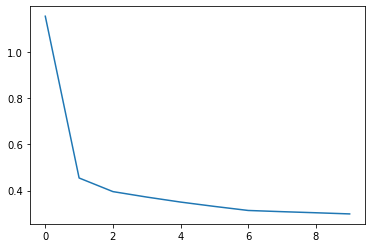

In [19]:
plt.plot(history.history['loss'])

In [20]:
labels = {
    0 : "benign" , 
    1 : "Malignant"
}

In [21]:
path = "/home/anandhkrishna/Untitled Folder/skin-cancer-malignant-vs-benign/test/benign/1013.jpg"

In [22]:
img = image.load_img(path, target_size=(224, 224))
x = image.img_to_array(img)/255
x = np.expand_dims(x, axis=0)
classes = model.predict([x])

In [23]:
pred_labels = np.argmax(classes, axis = 1)
pred_labels

array([0])

In [24]:
for i in pred_labels:
    print(labels[i])

benign
